# Covid Candles – Sentiment Analysis
----

**Author:** Simon Aytes

**[GitHub](https://github.com/SimonAytes)**

**[Website](https://www.saytes.io)**

## Import Packages

In [30]:
import pandas as pd
import csv
import os
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [31]:
# Download NLTK packages
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt"])

[nltk_data] Downloading package names to /Users/simon/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/simon/nltk_data...
[nltk_data]   Packag

True

In [32]:
# Get path to the repo directory
dir_path = "/".join(os.getcwd().split("/")[0:-1])

# 1. Load pre-processed data
----

In [33]:
# Load in previously gathered reviews
reviews = pd.read_csv(open(dir_path + "/data/interim/reviews-cleaned.csv"))

# 2. Explore Data
----

## 2.1 View rating distribution

<AxesSubplot:>

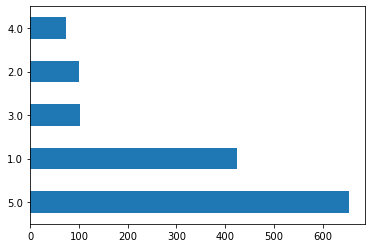

In [34]:
# View the distributions of ratings
reviews['rating'].value_counts().plot(kind='barh')

## 2.2 View date distribution

In [35]:
# View the distributions of dates
reviews['date'].value_counts()

2021-12-28    58
2021-12-23    38
2021-11-18    29
2021-12-31    28
2021-12-10    27
              ..
2021-10-15     3
2021-10-13     3
2021-11-13     3
2021-10-23     1
2021-10-16     1
Name: date, Length: 93, dtype: int64

# 3. Sentiment Analysis
----

## 3.1 Configure sentiment analyzer

In [36]:
# Create a sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Create an empty list to house sentiments
sentiment = []

## 3.2 Analyze review sentiment

Each review will be classified as: (1) positive, (2) negative, (3) neutral, or (4) na.

In [37]:
# Iterate through each row of "reviews"
for index, row in reviews.iterrows():
    # Try to analyze the sentiment (if not na)
    try:
        # Analyze the review
        t = sentiment_analyzer.polarity_scores(row['review'])

        # Assign sentiment based on compound sentiment value
        # If it is positive, mark positive
        if t['compound'] > 0:
            sentiment.append("positive")
        # If it is negative, mark negative
        elif t['compound'] < 0:
            sentiment.append("negative")
        # Else, mark neutral
        else:
            sentiment.append("neutral")

    # Mark all failed attempts as "na"
    except:
        sentiment.append("na")

In [38]:
# Create new column in "reviews" that contains the sentiment of each review
reviews['sentiment'] = sentiment

## 3.3 View review sentiment distribution

<AxesSubplot:>

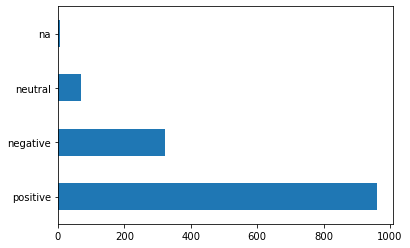

In [39]:
# View the distribution of sentiments
reviews['sentiment'].value_counts().plot(kind='barh')

## 3.4 Output tagged reviews

In [40]:
reviews.to_csv((dir_path + "/data/interim/reviews-classified.csv"), index = False)

# 4. Process sentiment data
----

In [41]:
negative_reviews = pd.DataFrame()

## 4.1 Filter by sentiment

In [42]:
# Filter all negative reviews
negative_reviews = reviews[reviews['sentiment'] == "negative"]

## 4.2 Filter by rating

In [43]:
# Filter all ratings less than 3 (1 or 2)
negative_reviews = negative_reviews[negative_reviews['rating'] < 3.0]

## 4.3 Filter by mention of smell

In [44]:
# Gather all negative reviews that mention smell, scent, or fragrance
negative_reviews_smell = negative_reviews.loc[negative_reviews['review'].str.contains('smell'),:]

## 4.4 Sort reviews by date

In [45]:
# Sort the results by date
negative_reviews_smell = negative_reviews_smell.sort_values(by="date")

## 4.5 Output processed data

In [46]:
negative_reviews_smell.to_csv((dir_path + "/data/interim/negative-reviews-smell.csv"), index = False)